# **Ch 0. 초기 설정 및 라이브러리 불러오기**

In [1]:
# 구글 드라이브로부터 데이터 불러오기
# from google.colab import drive
# drive.mount('/content/gdrive')

# 변수 저장/불러오기
import pickle

# 학습/평가 데이터 분할
from sklearn.model_selection import train_test_split

# 학습 결과 평가
from sklearn.metrics import mean_squared_error, r2_score

# 시각화
import matplotlib.pyplot as plt

# SVR library 불러오기
from sklearn.svm import SVR

# RFR library 불러오기
from sklearn.ensemble import RandomForestRegressor

# Tensorflow 불러오기
import tensorflow as tf


In [2]:
# %cd /..
# %cd content/gdrive/MyDrive/hanon_1st

# Additional command for the diriectory
# !pwd : 현재 directory 확인
# !ls  : 현재 directory 에서의 파일들 확인

# 변수 불러오기
with open("Heat_Exchanger_pp_adv.pkl", "rb") as file:
    X_scaled, Y_scaled, scaler_X, scaler_Y = pickle.load(file)

# 데이터를 학습용과 테스트용으로 분리
X_scaled_train, X_scaled_test, Y_scaled_train, Y_scaled_test = train_test_split(X_scaled, Y_scaled, test_size=0.3, random_state=42)

In [3]:
# 모델생성 시 warning 에 대한 fix

print(X_scaled_train.shape)
print(Y_scaled_train.shape)
Y_scaled_train = Y_scaled_train.reshape(-1, )
print(Y_scaled_train.shape)

# X_scaled_train, X_scaled_test

(367, 10)
(367, 1)
(367,)


# **Ch 1. Support Vector Regression (SVR)**

## Ch 1-1. 모델 생성 및 학습


In [4]:
# SVR 학습
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html
svm_model = SVR(kernel='linear')
# svm_model = SVR(kernel='rbf')
svm_model.fit(X_scaled_train, Y_scaled_train)

SVR(kernel='linear')

## Ch 1-2. 모델 평가

MSE_train: 0.32968233494291416
R-squared_train: 0.6646945360535457
MSE_test: 0.265773631185369
R-squared_test: 0.7432436303983758


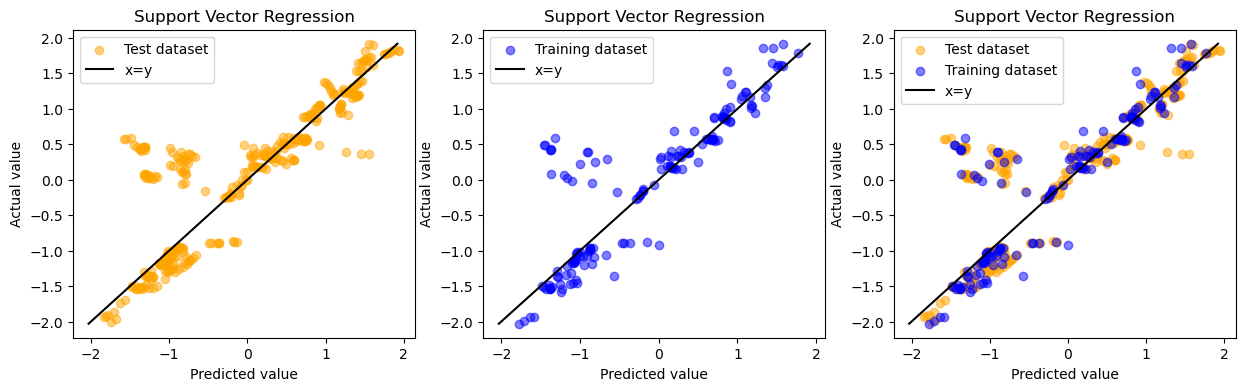

In [5]:
# 학습된 SVR을 활용하여 테스트 셋 예측
Y_scaled_train_pred = svm_model.predict(X_scaled_train)
Y_scaled_test_pred = svm_model.predict(X_scaled_test)

# SVR 학습 성능 평가
mse_train = mean_squared_error(Y_scaled_train, Y_scaled_train_pred)
print("MSE_train:", mse_train)
r2_train = r2_score(Y_scaled_train, Y_scaled_train_pred)
print("R-squared_train:", r2_train)

mse_test = mean_squared_error(Y_scaled_test, Y_scaled_test_pred)
print("MSE_test:", mse_test)
r2_test = r2_score(Y_scaled_test, Y_scaled_test_pred)
print("R-squared_test:", r2_test)

# 예측 값과 실제 값 비교를 위한 데이터 준비
plt.figure(figsize=(15, 4))  # 그래프 크기 설정

# 실제 값과 예측 값 비교를 위한 plot for test dataset
plt.subplot(1,3,1)
plt.scatter(Y_scaled_train_pred, Y_scaled_train, c='orange', alpha=0.5)
# x=y 그리기
min_val = min(min(Y_scaled_test_pred), min(Y_scaled_test))
max_val = max(max(Y_scaled_test_pred), max(Y_scaled_test))
plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='-')
# plot
plt.title("Support Vector Regression")
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.legend(['Test dataset','x=y'])

# 실제 값과 예측 값 비교를 위한 plot for training dataset
plt.subplot(1,3,2)
plt.scatter(Y_scaled_test_pred, Y_scaled_test, c='blue', alpha=0.5)
# x=y 그리기
min_val = min(min(Y_scaled_test_pred), min(Y_scaled_test))
max_val = max(max(Y_scaled_test_pred), max(Y_scaled_test))
plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='-')
# plot
plt.title("Support Vector Regression")
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.legend(['Training dataset','x=y'])

# 실제 값과 예측 값 비교를 위한 plot for training dataset
plt.subplot(1,3,3)
plt.scatter(Y_scaled_train_pred, Y_scaled_train, c='orange', alpha=0.5)
plt.scatter(Y_scaled_test_pred, Y_scaled_test, c='blue', alpha=0.5)
# x=y 그리기
min_val = min(min(Y_scaled_test_pred), min(Y_scaled_test))
max_val = max(max(Y_scaled_test_pred), max(Y_scaled_test))
plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='-')
# plot
plt.title("Support Vector Regression")
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.legend(['Test dataset','Training dataset','x=y'])

plt.show()

# **Ch 2. Random Forest Regression (RFR)**


## Ch 2-1. 모델 생성 및 학습

In [6]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
rfr_model = RandomForestRegressor(n_estimators=5)
# rfr_model = RandomForestRegressor(n_estimators=20)
# rfr_model = RandomForestRegressor(n_estimators=100, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)[source]
rfr_model.fit(X_scaled_train, Y_scaled_train)

RandomForestRegressor(n_estimators=5)

## Ch 2-2. 모델 평가

MSE_train: 0.03318447974122435
R-squared_train: 0.9662495190184224
MSE_test: 0.1549705872676953
R-squared_test: 0.850287309525703


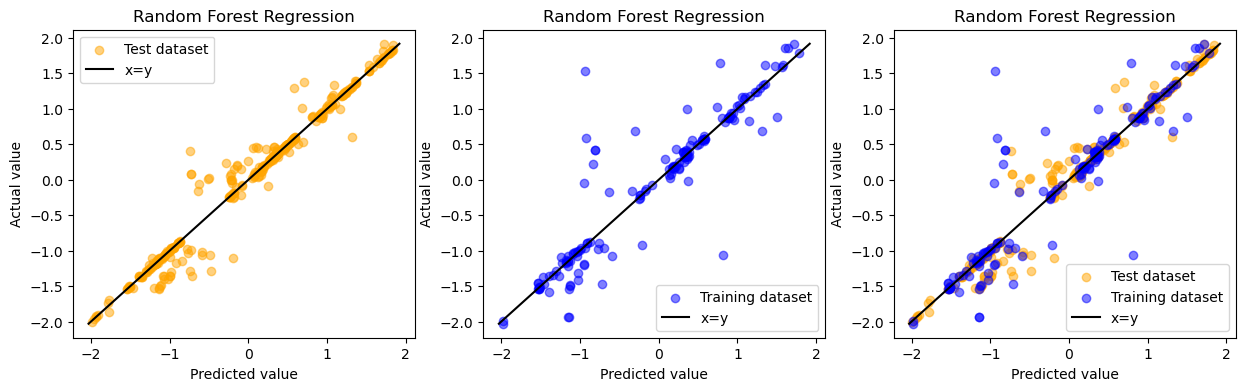

In [7]:
# 학습된 RFR을 활용하여 테스트 셋 예측
Y_scaled_train_pred = rfr_model.predict(X_scaled_train)
Y_scaled_test_pred = rfr_model.predict(X_scaled_test)

# RFR 학습 성능 평가 for train
mse_train = mean_squared_error(Y_scaled_train, Y_scaled_train_pred)
print("MSE_train:", mse_train)
r2_train = r2_score(Y_scaled_train, Y_scaled_train_pred)
print("R-squared_train:", r2_train)

# RFR 학습 성능 평가 for test
mse_test = mean_squared_error(Y_scaled_test, Y_scaled_test_pred)
print("MSE_test:", mse_test)
r2_test = r2_score(Y_scaled_test, Y_scaled_test_pred)
print("R-squared_test:", r2_test)

# 예측 값과 실제 값 비교를 위한 데이터 준비
plt.figure(figsize=(15, 4))  # 그래프 크기 설정

# 실제 값과 예측 값 비교를 위한 plot for test dataset
plt.subplot(1,3,1)
plt.scatter(Y_scaled_train_pred, Y_scaled_train, c='orange', alpha=0.5)
# x=y 그리기
min_val = min(min(Y_scaled_test_pred), min(Y_scaled_test))
max_val = max(max(Y_scaled_test_pred), max(Y_scaled_test))
plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='-')
# plot
plt.title("Random Forest Regression")
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.legend(['Test dataset','x=y'])

# 실제 값과 예측 값 비교를 위한 plot for training dataset
plt.subplot(1,3,2)
plt.scatter(Y_scaled_test_pred, Y_scaled_test, c='blue', alpha=0.5)
# x=y 그리기
min_val = min(min(Y_scaled_test_pred), min(Y_scaled_test))
max_val = max(max(Y_scaled_test_pred), max(Y_scaled_test))
plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='-')
# plot
plt.title("Random Forest Regression")
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.legend(['Training dataset','x=y'])

# 실제 값과 예측 값 비교를 위한 plot for training dataset
plt.subplot(1,3,3)
plt.scatter(Y_scaled_train_pred, Y_scaled_train, c='orange', alpha=0.5)
plt.scatter(Y_scaled_test_pred, Y_scaled_test, c='blue', alpha=0.5)
# x=y 그리기
min_val = min(min(Y_scaled_test_pred), min(Y_scaled_test))
max_val = max(max(Y_scaled_test_pred), max(Y_scaled_test))
plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='-')
# plot
plt.title("Random Forest Regression")
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.legend(['Test dataset','Training dataset','x=y'])

plt.show()

# **Ch 3. Deep Neural Network (DNN)**


## Ch 3-1. 모델 생성 및 학습

In [8]:
dnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_scaled_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])
dnn_model.compile(loss='mean_squared_error', optimizer='adam')

hist=dnn_model.fit(X_scaled_train, Y_scaled_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
12/12 [==============================] - 1s 2ms/step - loss: 0.8424
Epoch 2/50
12/12 [==============================] - 0s 2ms/step - loss: 0.6361
Epoch 3/50
12/12 [==============================] - 0s 2ms/step - loss: 0.4495
Epoch 4/50
12/12 [==============================] - 0s 2ms/step - loss: 0.3291
Epoch 5/50
12/12 [==============================] - 0s 2ms/step - loss: 0.2681
Epoch 6/50
12/12 [==============================] - 0s 2ms/step - loss: 0.2250
Epoch 7/50
12/12 [==============================] - 0s 2ms/step - loss: 0.2036
Epoch 8/50
12/12 [==============================] - 0s 2ms/step - loss: 0.1798
Epoch 9/50
12/12 [==============================] - 0s 2ms/step - loss: 0.1726
Epoch 10/50
12/12 [==============================] - 0s 1ms/step - loss: 0.1532
Epoch 11/50
12/12 [==============================] - 0s 2ms/step - loss: 0.1364
Epoch 12/50
12/12 [==============================] - 0s 2ms/step - loss: 0.1264
Epoch 13/50
12/12 [==============================

## Ch 3-2. 모델 평가

5/5 [==============================] - 0s 1ms/step
MSE_train: 0.07028975798591512
R-squared_train: 0.9285113655961208
MSE_test: 0.10625477549769646
R-squared_test: 0.8973502740360421


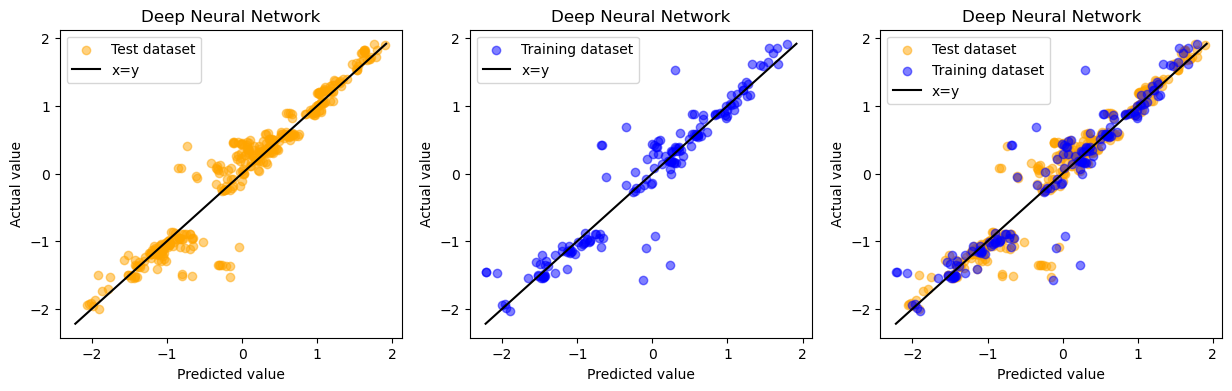

In [9]:
# 학습된 DNN을 활용하여 테스트 셋 예측
Y_scaled_train_pred = dnn_model.predict(X_scaled_train)
Y_scaled_test_pred = dnn_model.predict(X_scaled_test)

# DNN 학습 성능 평가 for train
mse_train = mean_squared_error(Y_scaled_train, Y_scaled_train_pred)
print("MSE_train:", mse_train)
r2_train = r2_score(Y_scaled_train, Y_scaled_train_pred)
print("R-squared_train:", r2_train)

# DNN 학습 성능 평가 for test
mse_test = mean_squared_error(Y_scaled_test, Y_scaled_test_pred)
print("MSE_test:", mse_test)
r2_test = r2_score(Y_scaled_test, Y_scaled_test_pred)
print("R-squared_test:", r2_test)

# 예측 값과 실제 값 비교를 위한 데이터 준비
plt.figure(figsize=(15, 4))  # 그래프 크기 설정

# 실제 값과 예측 값 비교를 위한 plot for test dataset
plt.subplot(1,3,1)
plt.scatter(Y_scaled_train_pred, Y_scaled_train, c='orange', alpha=0.5)
# x=y 그리기
min_val = min(min(Y_scaled_test_pred), min(Y_scaled_test))
max_val = max(max(Y_scaled_test_pred), max(Y_scaled_test))
plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='-')
# plot
plt.title("Deep Neural Network")
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.legend(['Test dataset','x=y'])

# 실제 값과 예측 값 비교를 위한 plot for training dataset
plt.subplot(1,3,2)
plt.scatter(Y_scaled_test_pred, Y_scaled_test, c='blue', alpha=0.5)
# x=y 그리기
min_val = min(min(Y_scaled_test_pred), min(Y_scaled_test))
max_val = max(max(Y_scaled_test_pred), max(Y_scaled_test))
plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='-')
# plot
plt.title("Deep Neural Network")
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.legend(['Training dataset','x=y'])

# 실제 값과 예측 값 비교를 위한 plot for training dataset
plt.subplot(1,3,3)
plt.scatter(Y_scaled_train_pred, Y_scaled_train, c='orange', alpha=0.5)
plt.scatter(Y_scaled_test_pred, Y_scaled_test, c='blue', alpha=0.5)
# x=y 그리기
min_val = min(min(Y_scaled_test_pred), min(Y_scaled_test))
max_val = max(max(Y_scaled_test_pred), max(Y_scaled_test))
plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='-')
# plot
plt.title("Deep Neural Network")
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.legend(['Test dataset','Training dataset','x=y'])

plt.show()

# **Ch 4. Hyperprameter tuning; Grid Search**


## Grid Search

![Slide15](https://github.com/woooky/jinwook/assets/84065529/1231ef98-1c87-4889-b7ce-9d385db3ade0)

## Cross validation

![Slide16](https://github.com/woooky/jinwook/assets/84065529/44bfeac5-8daf-4907-abe4-fb4322c9af0c)

![Slide17](https://github.com/woooky/jinwook/assets/84065529/360dfbdc-e73b-461a-871f-f867cd9d9aff)

# **Ch 5. Random Forest Regression (RFR) with Grid Search**


## RFR with Grid Search

In [10]:
# Grid search 함수 불러오기
from sklearn.model_selection import GridSearchCV

In [11]:
# 변수 불러오기
with open("Heat_Exchanger_pp_adv.pkl", "rb") as file:
    X_scaled, Y_scaled, scaler_X, scaler_Y = pickle.load(file)

In [12]:
rfr_model = RandomForestRegressor()
# rfr_model = RandomForestRegressor(n_estimators=100, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)[source]
params_= {
    'n_estimators': [5, 25, 125],          # 결정 트리 개수
    'max_depth': [None, 10, 20, 30],           # 트리의 최대 깊이
    'min_samples_split': [2, 5, 10],           # 노드를 분할하기 위한 최소 샘플 개수
#    'min_samples_leaf': [1, 2, 4]              # 리프 노드가 되기 위한 최소 샘플 개수
}

grid_cv = GridSearchCV(estimator=rfr_model, param_grid=params_, scoring='neg_mean_squared_error', cv=5, verbose=2)

grid_cv_result=grid_cv.fit(X_scaled, Y_scaled.ravel())

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=25; total time=   0.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=25; total time=   0.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=25; total time=   0.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=25; total time=   0.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=25; total time=   0.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=125; total time=   0.4s
[CV] END max_depth=None, min_samples_spl

[CV] END max_depth=20, min_samples_split=2, n_estimators=125; total time=   0.4s
[CV] END max_depth=20, min_samples_split=2, n_estimators=125; total time=   0.4s
[CV] END max_depth=20, min_samples_split=2, n_estimators=125; total time=   0.4s
[CV] END max_depth=20, min_samples_split=2, n_estimators=125; total time=   0.3s
[CV] END max_depth=20, min_samples_split=2, n_estimators=125; total time=   0.4s
[CV] END ..max_depth=20, min_samples_split=5, n_estimators=5; total time=   0.0s
[CV] END ..max_depth=20, min_samples_split=5, n_estimators=5; total time=   0.0s
[CV] END ..max_depth=20, min_samples_split=5, n_estimators=5; total time=   0.0s
[CV] END ..max_depth=20, min_samples_split=5, n_estimators=5; total time=   0.0s
[CV] END ..max_depth=20, min_samples_split=5, n_estimators=5; total time=   0.0s
[CV] END .max_depth=20, min_samples_split=5, n_estimators=25; total time=   0.0s
[CV] END .max_depth=20, min_samples_split=5, n_estimators=25; total time=   0.0s
[CV] END .max_depth=20, min_

In [13]:
print("Best Hyperparameters:", grid_cv_result.best_params_)
print("Best mean_squared_error:", -grid_cv_result.best_score_)

Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 25}
Best mean_squared_error: 1.0929113700654283


## 최적화된 하이퍼 파라미터 사용하기

In [14]:
# 변수 불러오기
with open("Heat_Exchanger_pp_adv.pkl", "rb") as file:
    X_scaled, Y_scaled, scaler_X, scaler_Y = pickle.load(file)

# 데이터를 학습용과 테스트용으로 분리
X_scaled_train, X_scaled_test, Y_scaled_train, Y_scaled_test = train_test_split(X_scaled, Y_scaled, test_size=0.3, random_state=42)

rfr_model_opt = RandomForestRegressor(max_depth= None, min_samples_leaf= 2, min_samples_split=2, n_estimators= 25)

rfr_model_opt.fit(X_scaled_train, Y_scaled_train.ravel())

RandomForestRegressor(min_samples_leaf=2, n_estimators=25)

MSE_train: 0.027223206788683518
R-squared_train: 0.9723124686557126
MSE_test: 0.12022291834695999
R-squared_test: 0.88385604726848


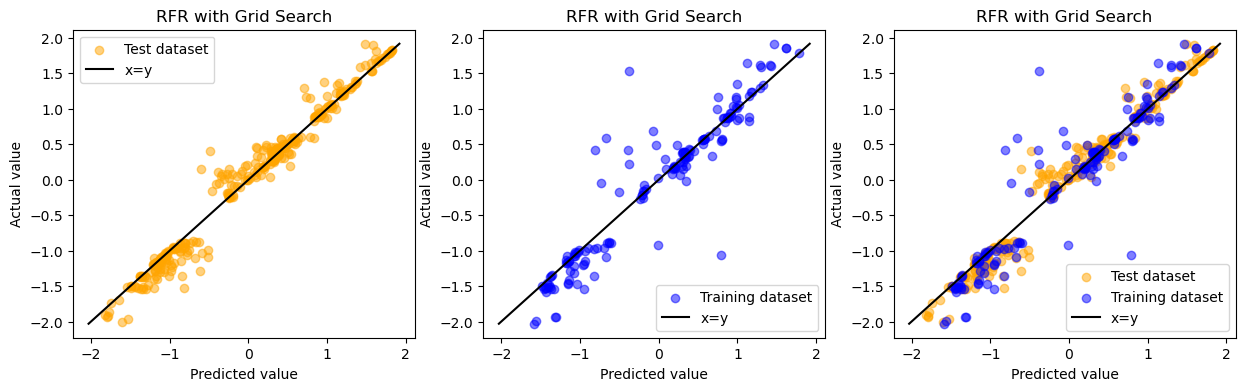

In [15]:
# 학습된 RFR을 활용하여 테스트 셋 예측
Y_scaled_train_pred = rfr_model_opt.predict(X_scaled_train)
Y_scaled_test_pred = rfr_model_opt.predict(X_scaled_test)

# RFR 학습 성능 평가 for train
mse_train = mean_squared_error(Y_scaled_train, Y_scaled_train_pred)
print("MSE_train:", mse_train)
r2_train = r2_score(Y_scaled_train, Y_scaled_train_pred)
print("R-squared_train:", r2_train)

# RFR 학습 성능 평가 for test
mse_test = mean_squared_error(Y_scaled_test, Y_scaled_test_pred)
print("MSE_test:", mse_test)
r2_test = r2_score(Y_scaled_test, Y_scaled_test_pred)
print("R-squared_test:", r2_test)

# 예측 값과 실제 값 비교를 위한 데이터 준비
plt.figure(figsize=(15, 4))  # 그래프 크기 설정

# 실제 값과 예측 값 비교를 위한 plot for test dataset
plt.subplot(1,3,1)
plt.scatter(Y_scaled_train_pred, Y_scaled_train, c='orange', alpha=0.5)
# x=y 그리기
min_val = min(min(Y_scaled_test_pred), min(Y_scaled_test))
max_val = max(max(Y_scaled_test_pred), max(Y_scaled_test))
plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='-')
# plot
plt.title("RFR with Grid Search")
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.legend(['Test dataset','x=y'])

# 실제 값과 예측 값 비교를 위한 plot for training dataset
plt.subplot(1,3,2)
plt.scatter(Y_scaled_test_pred, Y_scaled_test, c='blue', alpha=0.5)
# x=y 그리기
min_val = min(min(Y_scaled_test_pred), min(Y_scaled_test))
max_val = max(max(Y_scaled_test_pred), max(Y_scaled_test))
plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='-')
# plot
plt.title("RFR with Grid Search")
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.legend(['Training dataset','x=y'])

# 실제 값과 예측 값 비교를 위한 plot for training dataset
plt.subplot(1,3,3)
plt.scatter(Y_scaled_train_pred, Y_scaled_train, c='orange', alpha=0.5)
plt.scatter(Y_scaled_test_pred, Y_scaled_test, c='blue', alpha=0.5)
# x=y 그리기
min_val = min(min(Y_scaled_test_pred), min(Y_scaled_test))
max_val = max(max(Y_scaled_test_pred), max(Y_scaled_test))
plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='-')
# plot
plt.title("RFR with Grid Search")
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.legend(['Test dataset','Training dataset','x=y'])

plt.show()

# **Ch 6. Deep Neural Network (DNN) with Grid Search**


In [69]:
# Tensorflow 불러오기

import tensorflow as tf
print(tf.__version__)
import keras
print(keras.__version__)
import scikeras
print(scikeras.__version__)

# Grid search 함수 불러오기
from sklearn.model_selection import GridSearchCV

# import lightgbm

# import sys
# print(sys.version)

# from keras.wrappers.scikit_learn import KerasRegressor
# - from tensorflow.keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor --> deprecated
 
# from scikeras.wrappers import KerasClassifier, KerasRegressor
from scikeras.wrappers import KerasRegressor
# !pip install smt

2.13.0
2.13.1
0.11.0


In [70]:
# 변수 불러오기
with open("Heat_Exchanger_pp_adv.pkl", "rb") as file:
    X_scaled, Y_scaled, scaler_X, scaler_Y = pickle.load(file)

In [71]:
print(X_scaled.shape)
print(Y_scaled.shape)

(525, 10)
(525, 1)


In [81]:
def create_dnn_model( hidden_units=64, layer_depth=1, ):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(hidden_units, input_dim=X_scaled.shape[1], activation='relu'))

    for _ in range(layer_depth - 1):
        model.add(tf.keras.layers.Dense(hidden_units, activation='relu'))

    model.add(tf.keras.layers.Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# dnn_model = keras.wrappers.scikit_learn.KerasRegressor(build_fn=create_dnn_model, verbose=1) # --> deprecated

dnn_model = scikeras.wrappers.KerasRegressor(build_fn=create_dnn_model, verbose=1)


In [ ]:
# rfr_model = RandomForestRegressor()
# # rfr_model = RandomForestRegressor(n_estimators=100, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)[source]
# params_= {
#     'n_estimators': [5, 25, 125],          # 결정 트리 개수
#     'max_depth': [None, 10, 20, 30],           # 트리의 최대 깊이
#     'min_samples_split': [2, 5, 10],           # 노드를 분할하기 위한 최소 샘플 개수
# #    'min_samples_leaf': [1, 2, 4]              # 리프 노드가 되기 위한 최소 샘플 개수
# }

# grid_cv = GridSearchCV(estimator=rfr_model, param_grid=params_, scoring='neg_mean_squared_error', cv=5, verbose=2)
# grid_cv_result=grid_cv.fit(X_scaled, Y_scaled.ravel())

In [73]:
params = {
    'batch_size': [2, 3,4],
    'model': [None]
}

# 'model': [None]
# 	build_fn=<function create_dnn_model at 0x0000019B68D034C0>
# 	warm_start=False
# 	random_state=None
#   optimizer=rmsprop
# 	loss=None
# 	metrics=None
# 	batch_size=None
# 	validation_batch_size=None
# 	verbose=1
# 	callbacks=None
# 	validation_split=0.0
# 	shuffle=True
# 	run_eagerly=False
# 	epochs=1

# }

# params = {'n_estimators' : [10, 100],
#           'max_depth' : [6, 8, 10, 12],
#           'min_samples_leaf' : [8, 12, 18],
#           'min_samples_split' : [8, 16, 20]
#          }

grid_cv = GridSearchCV(estimator=dnn_model, param_grid=params, scoring='neg_mean_squared_error', cv=5)
# grid_cv.get_params().keys() # parameter 찾기
print('\n Hyperparameter:\n', grid_cv.get_params())

# grid_cv_result = grid_cv.fit(X_scaled, Y_scaled.ravel(), epochs=50, batch_size=32, verbose=1)
# grid_cv_result = grid_cv.fit(X_scaled, Y_scaled.ravel())

print("Best Hyperparameters:", grid_cv_result.best_params_)
print("Best mean_squared_error:", -grid_cv_result.best_score_)


 Hyperparameter:
 {'cv': 5, 'error_score': nan, 'estimator__model': None, 'estimator__build_fn': <function create_dnn_model at 0x0000019B7D9BE980>, 'estimator__warm_start': False, 'estimator__random_state': None, 'estimator__optimizer': 'rmsprop', 'estimator__loss': None, 'estimator__metrics': None, 'estimator__batch_size': None, 'estimator__validation_batch_size': None, 'estimator__verbose': 1, 'estimator__callbacks': None, 'estimator__validation_split': 0.0, 'estimator__shuffle': True, 'estimator__run_eagerly': False, 'estimator__epochs': 1, 'estimator': KerasRegressor(
	model=None
	build_fn=<function create_dnn_model at 0x0000019B7D9BE980>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
), 'n_jobs': None, 'param_grid': {'batch_size': [2, 3, 4], 'model': [None]}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_tr

In [75]:
# params = {
#     'hidden_units': [32, 64, 128],
#     'layer_depth': [2,4,8]
# }

params = {
    'batch_size': [2, 3, 4],
    'model': [None]
}

grid_cv = GridSearchCV(estimator=dnn_model, param_grid=params, scoring='neg_mean_squared_error', cv=5)

# grid_cv_result = grid_cv.fit(X_scaled, Y_scaled.ravel(), epochs=50, batch_size=32, verbose=1)

grid_cv_result = grid_cv.fit(X_scaled, Y_scaled.ravel(), epochs=50, batch_size=32, verbose=1)

Epoch 1/50


C:\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


14/14 [==============================] - 0s 2ms/step - loss: 0.9361
Epoch 2/50
14/14 [==============================] - 0s 2ms/step - loss: 0.8242
Epoch 3/50
14/14 [==============================] - 0s 2ms/step - loss: 0.7438
Epoch 4/50
14/14 [==============================] - 0s 1ms/step - loss: 0.6774
Epoch 5/50
14/14 [==============================] - 0s 2ms/step - loss: 0.6266
Epoch 6/50
14/14 [==============================] - 0s 1ms/step - loss: 0.5927
Epoch 7/50
14/14 [==============================] - 0s 2ms/step - loss: 0.5494
Epoch 8/50
14/14 [==============================] - 0s 2ms/step - loss: 0.5147
Epoch 9/50
14/14 [==============================] - 0s 2ms/step - loss: 0.4872
Epoch 10/50
14/14 [==============================] - 0s 1ms/step - loss: 0.4583
Epoch 11/50
14/14 [==============================] - 0s 1ms/step - loss: 0.4325
Epoch 12/50
14/14 [==============================] - 0s 1ms/step - loss: 0.4118
Epoch 13/50
14/14 [==============================] - 0s 1ms/

C:\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


14/14 [==============================] - 0s 1ms/step - loss: 1.0328
Epoch 2/50
14/14 [==============================] - 0s 2ms/step - loss: 0.8646
Epoch 3/50
14/14 [==============================] - 0s 1ms/step - loss: 0.7854
Epoch 4/50
14/14 [==============================] - 0s 1ms/step - loss: 0.7145
Epoch 5/50
14/14 [==============================] - 0s 1ms/step - loss: 0.6561
Epoch 6/50
14/14 [==============================] - 0s 1ms/step - loss: 0.6004
Epoch 7/50
14/14 [==============================] - 0s 1ms/step - loss: 0.5518
Epoch 8/50
14/14 [==============================] - 0s 1ms/step - loss: 0.5086
Epoch 9/50
14/14 [==============================] - 0s 2ms/step - loss: 0.4705
Epoch 10/50
14/14 [==============================] - 0s 1ms/step - loss: 0.4368
Epoch 11/50
14/14 [==============================] - 0s 2ms/step - loss: 0.4110
Epoch 12/50
14/14 [==============================] - 0s 2ms/step - loss: 0.3811
Epoch 13/50
14/14 [==============================] - 0s 2ms/

C:\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


14/14 [==============================] - 0s 1ms/step - loss: 0.7155
Epoch 2/50
14/14 [==============================] - 0s 2ms/step - loss: 0.6233
Epoch 3/50
14/14 [==============================] - 0s 1ms/step - loss: 0.5597
Epoch 4/50
14/14 [==============================] - 0s 1ms/step - loss: 0.5032
Epoch 5/50
14/14 [==============================] - 0s 1ms/step - loss: 0.4582
Epoch 6/50
14/14 [==============================] - 0s 1ms/step - loss: 0.4235
Epoch 7/50
14/14 [==============================] - 0s 1ms/step - loss: 0.3894
Epoch 8/50
14/14 [==============================] - 0s 1ms/step - loss: 0.3653
Epoch 9/50
14/14 [==============================] - 0s 1ms/step - loss: 0.3396
Epoch 10/50
14/14 [==============================] - 0s 1ms/step - loss: 0.3179
Epoch 11/50
14/14 [==============================] - 0s 2ms/step - loss: 0.3005
Epoch 12/50
14/14 [==============================] - 0s 2ms/step - loss: 0.2854
Epoch 13/50
14/14 [==============================] - 0s 1ms/

C:\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


14/14 [==============================] - 0s 1ms/step - loss: 0.9978
Epoch 2/50
14/14 [==============================] - 0s 1ms/step - loss: 0.8286
Epoch 3/50
14/14 [==============================] - 0s 1ms/step - loss: 0.7094
Epoch 4/50
14/14 [==============================] - 0s 1ms/step - loss: 0.6120
Epoch 5/50
14/14 [==============================] - 0s 1ms/step - loss: 0.5322
Epoch 6/50
14/14 [==============================] - 0s 1ms/step - loss: 0.4667
Epoch 7/50
14/14 [==============================] - 0s 1ms/step - loss: 0.4079
Epoch 8/50
14/14 [==============================] - 0s 1ms/step - loss: 0.3599
Epoch 9/50
14/14 [==============================] - 0s 1ms/step - loss: 0.3195
Epoch 10/50
14/14 [==============================] - 0s 1ms/step - loss: 0.2873
Epoch 11/50
14/14 [==============================] - 0s 1ms/step - loss: 0.2617
Epoch 12/50
14/14 [==============================] - 0s 1ms/step - loss: 0.2435
Epoch 13/50
14/14 [==============================] - 0s 1ms/

C:\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


14/14 [==============================] - 0s 1ms/step - loss: 1.2561
Epoch 2/50
14/14 [==============================] - 0s 1ms/step - loss: 0.9312
Epoch 3/50
14/14 [==============================] - 0s 1ms/step - loss: 0.8314
Epoch 4/50
14/14 [==============================] - 0s 1ms/step - loss: 0.7318
Epoch 5/50
14/14 [==============================] - 0s 1ms/step - loss: 0.6527
Epoch 6/50
14/14 [==============================] - 0s 1ms/step - loss: 0.5833
Epoch 7/50
14/14 [==============================] - 0s 1ms/step - loss: 0.5259
Epoch 8/50
14/14 [==============================] - 0s 2ms/step - loss: 0.4687
Epoch 9/50
14/14 [==============================] - 0s 1ms/step - loss: 0.4214
Epoch 10/50
14/14 [==============================] - 0s 1ms/step - loss: 0.3754
Epoch 11/50
14/14 [==============================] - 0s 1ms/step - loss: 0.3447
Epoch 12/50
14/14 [==============================] - 0s 1ms/step - loss: 0.3146
Epoch 13/50
14/14 [==============================] - 0s 1ms/

C:\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


14/14 [==============================] - 0s 1ms/step - loss: 1.3162
Epoch 2/50
14/14 [==============================] - 0s 2ms/step - loss: 1.0505
Epoch 3/50
14/14 [==============================] - 0s 1ms/step - loss: 0.9255
Epoch 4/50
14/14 [==============================] - 0s 1ms/step - loss: 0.8411
Epoch 5/50
14/14 [==============================] - 0s 1ms/step - loss: 0.7639
Epoch 6/50
14/14 [==============================] - 0s 1ms/step - loss: 0.6996
Epoch 7/50
14/14 [==============================] - 0s 1ms/step - loss: 0.6485
Epoch 8/50
14/14 [==============================] - 0s 1ms/step - loss: 0.6068
Epoch 9/50
14/14 [==============================] - 0s 1ms/step - loss: 0.5587
Epoch 10/50
14/14 [==============================] - 0s 1ms/step - loss: 0.5249
Epoch 11/50
14/14 [==============================] - 0s 985us/step - loss: 0.4905
Epoch 12/50
14/14 [==============================] - 0s 2ms/step - loss: 0.4589
Epoch 13/50
14/14 [==============================] - 0s 1m

C:\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


14/14 [==============================] - 1s 1ms/step - loss: 1.3309
Epoch 2/50
14/14 [==============================] - 0s 1ms/step - loss: 1.1026
Epoch 3/50
14/14 [==============================] - 0s 1ms/step - loss: 0.9983
Epoch 4/50
14/14 [==============================] - 0s 1ms/step - loss: 0.9012
Epoch 5/50
14/14 [==============================] - 0s 1ms/step - loss: 0.8205
Epoch 6/50
14/14 [==============================] - 0s 1ms/step - loss: 0.7545
Epoch 7/50
14/14 [==============================] - 0s 1ms/step - loss: 0.6878
Epoch 8/50
14/14 [==============================] - 0s 1ms/step - loss: 0.6288
Epoch 9/50
14/14 [==============================] - 0s 1ms/step - loss: 0.5767
Epoch 10/50
14/14 [==============================] - 0s 1ms/step - loss: 0.5277
Epoch 11/50
14/14 [==============================] - 0s 1ms/step - loss: 0.4845
Epoch 12/50
14/14 [==============================] - 0s 2ms/step - loss: 0.4439
Epoch 13/50
14/14 [==============================] - 0s 2ms/

C:\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


14/14 [==============================] - 0s 1ms/step - loss: 0.7866
Epoch 2/50
14/14 [==============================] - 0s 2ms/step - loss: 0.6575
Epoch 3/50
14/14 [==============================] - 0s 2ms/step - loss: 0.5781
Epoch 4/50
14/14 [==============================] - 0s 2ms/step - loss: 0.5233
Epoch 5/50
14/14 [==============================] - 0s 1ms/step - loss: 0.4762
Epoch 6/50
14/14 [==============================] - 0s 1ms/step - loss: 0.4337
Epoch 7/50
14/14 [==============================] - 0s 1ms/step - loss: 0.4006
Epoch 8/50
14/14 [==============================] - 0s 2ms/step - loss: 0.3670
Epoch 9/50
14/14 [==============================] - 0s 2ms/step - loss: 0.3408
Epoch 10/50
14/14 [==============================] - 0s 1ms/step - loss: 0.3198
Epoch 11/50
14/14 [==============================] - 0s 1ms/step - loss: 0.2970
Epoch 12/50
14/14 [==============================] - 0s 1ms/step - loss: 0.2802
Epoch 13/50
14/14 [==============================] - 0s 1ms/

C:\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


14/14 [==============================] - 0s 1ms/step - loss: 1.0154
Epoch 2/50
14/14 [==============================] - 0s 1ms/step - loss: 0.8360
Epoch 3/50
14/14 [==============================] - 0s 1ms/step - loss: 0.7261
Epoch 4/50
14/14 [==============================] - 0s 1ms/step - loss: 0.6457
Epoch 5/50
14/14 [==============================] - 0s 1ms/step - loss: 0.5630
Epoch 6/50
14/14 [==============================] - 0s 1ms/step - loss: 0.5006
Epoch 7/50
14/14 [==============================] - 0s 1ms/step - loss: 0.4409
Epoch 8/50
14/14 [==============================] - 0s 2ms/step - loss: 0.3895
Epoch 9/50
14/14 [==============================] - 0s 2ms/step - loss: 0.3464
Epoch 10/50
14/14 [==============================] - 0s 1ms/step - loss: 0.3102
Epoch 11/50
14/14 [==============================] - 0s 1ms/step - loss: 0.2796
Epoch 12/50
14/14 [==============================] - 0s 1ms/step - loss: 0.2565
Epoch 13/50
14/14 [==============================] - 0s 2ms/

C:\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


14/14 [==============================] - 0s 1ms/step - loss: 1.0497
Epoch 2/50
14/14 [==============================] - 0s 2ms/step - loss: 0.8756
Epoch 3/50
14/14 [==============================] - 0s 1ms/step - loss: 0.7854
Epoch 4/50
14/14 [==============================] - 0s 1ms/step - loss: 0.7082
Epoch 5/50
14/14 [==============================] - 0s 1ms/step - loss: 0.6362
Epoch 6/50
14/14 [==============================] - 0s 1ms/step - loss: 0.5727
Epoch 7/50
14/14 [==============================] - 0s 1ms/step - loss: 0.5162
Epoch 8/50
14/14 [==============================] - 0s 1ms/step - loss: 0.4681
Epoch 9/50
14/14 [==============================] - 0s 1ms/step - loss: 0.4227
Epoch 10/50
14/14 [==============================] - 0s 1ms/step - loss: 0.3858
Epoch 11/50
14/14 [==============================] - 0s 1ms/step - loss: 0.3527
Epoch 12/50
14/14 [==============================] - 0s 1ms/step - loss: 0.3259
Epoch 13/50
14/14 [==============================] - 0s 1ms/

C:\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


14/14 [==============================] - 0s 2ms/step - loss: 1.1291
Epoch 2/50
14/14 [==============================] - 0s 2ms/step - loss: 0.9854
Epoch 3/50
14/14 [==============================] - 0s 2ms/step - loss: 0.8868
Epoch 4/50
14/14 [==============================] - 0s 2ms/step - loss: 0.7999
Epoch 5/50
14/14 [==============================] - 0s 1ms/step - loss: 0.7253
Epoch 6/50
14/14 [==============================] - 0s 2ms/step - loss: 0.6673
Epoch 7/50
14/14 [==============================] - 0s 1ms/step - loss: 0.6198
Epoch 8/50
14/14 [==============================] - 0s 2ms/step - loss: 0.5773
Epoch 9/50
14/14 [==============================] - 0s 2ms/step - loss: 0.5371
Epoch 10/50
14/14 [==============================] - 0s 1ms/step - loss: 0.5043
Epoch 11/50
14/14 [==============================] - 0s 2ms/step - loss: 0.4721
Epoch 12/50
14/14 [==============================] - 0s 2ms/step - loss: 0.4425
Epoch 13/50
14/14 [==============================] - 0s 2ms/

C:\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


14/14 [==============================] - 0s 2ms/step - loss: 0.8755
Epoch 2/50
14/14 [==============================] - 0s 1ms/step - loss: 0.7470
Epoch 3/50
14/14 [==============================] - 0s 1ms/step - loss: 0.6732
Epoch 4/50
14/14 [==============================] - 0s 1ms/step - loss: 0.6138
Epoch 5/50
14/14 [==============================] - 0s 1ms/step - loss: 0.5560
Epoch 6/50
14/14 [==============================] - 0s 1ms/step - loss: 0.5065
Epoch 7/50
14/14 [==============================] - 0s 1ms/step - loss: 0.4664
Epoch 8/50
14/14 [==============================] - 0s 1ms/step - loss: 0.4251
Epoch 9/50
14/14 [==============================] - 0s 1ms/step - loss: 0.3896
Epoch 10/50
14/14 [==============================] - 0s 1ms/step - loss: 0.3604
Epoch 11/50
14/14 [==============================] - 0s 1ms/step - loss: 0.3324
Epoch 12/50
14/14 [==============================] - 0s 1ms/step - loss: 0.3118
Epoch 13/50
14/14 [==============================] - 0s 1ms/

C:\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


14/14 [==============================] - 0s 2ms/step - loss: 0.7609
Epoch 2/50
14/14 [==============================] - 0s 1ms/step - loss: 0.6157
Epoch 3/50
14/14 [==============================] - 0s 2ms/step - loss: 0.5455
Epoch 4/50
14/14 [==============================] - 0s 2ms/step - loss: 0.4905
Epoch 5/50
14/14 [==============================] - 0s 2ms/step - loss: 0.4530
Epoch 6/50
14/14 [==============================] - 0s 2ms/step - loss: 0.4186
Epoch 7/50
14/14 [==============================] - 0s 2ms/step - loss: 0.3829
Epoch 8/50
14/14 [==============================] - 0s 2ms/step - loss: 0.3513
Epoch 9/50
14/14 [==============================] - 0s 2ms/step - loss: 0.3274
Epoch 10/50
14/14 [==============================] - 0s 2ms/step - loss: 0.3060
Epoch 11/50
14/14 [==============================] - 0s 2ms/step - loss: 0.2842
Epoch 12/50
14/14 [==============================] - 0s 1ms/step - loss: 0.2688
Epoch 13/50
14/14 [==============================] - 0s 2ms/

C:\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


14/14 [==============================] - 1s 2ms/step - loss: 1.2924
Epoch 2/50
14/14 [==============================] - 0s 2ms/step - loss: 0.8837
Epoch 3/50
14/14 [==============================] - 0s 2ms/step - loss: 0.7738
Epoch 4/50
14/14 [==============================] - 0s 1ms/step - loss: 0.6969
Epoch 5/50
14/14 [==============================] - 0s 1ms/step - loss: 0.6285
Epoch 6/50
14/14 [==============================] - 0s 2ms/step - loss: 0.5678
Epoch 7/50
14/14 [==============================] - 0s 1ms/step - loss: 0.5119
Epoch 8/50
14/14 [==============================] - 0s 2ms/step - loss: 0.4630
Epoch 9/50
14/14 [==============================] - 0s 1ms/step - loss: 0.4239
Epoch 10/50
14/14 [==============================] - 0s 961us/step - loss: 0.3850
Epoch 11/50
14/14 [==============================] - 0s 947us/step - loss: 0.3551
Epoch 12/50
14/14 [==============================] - 0s 1ms/step - loss: 0.3290
Epoch 13/50
14/14 [==============================] - 0s 

C:\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


14/14 [==============================] - 0s 2ms/step - loss: 1.0316
Epoch 2/50
14/14 [==============================] - 0s 1ms/step - loss: 0.8709
Epoch 3/50
14/14 [==============================] - 0s 1ms/step - loss: 0.7529
Epoch 4/50
14/14 [==============================] - 0s 1ms/step - loss: 0.6687
Epoch 5/50
14/14 [==============================] - 0s 2ms/step - loss: 0.5824
Epoch 6/50
14/14 [==============================] - 0s 1ms/step - loss: 0.5315
Epoch 7/50
14/14 [==============================] - 0s 1ms/step - loss: 0.4635
Epoch 8/50
14/14 [==============================] - 0s 1ms/step - loss: 0.4168
Epoch 9/50
14/14 [==============================] - 0s 1ms/step - loss: 0.3708
Epoch 10/50
14/14 [==============================] - 0s 1ms/step - loss: 0.3329
Epoch 11/50
14/14 [==============================] - 0s 2ms/step - loss: 0.3004
Epoch 12/50
14/14 [==============================] - 0s 1ms/step - loss: 0.2770
Epoch 13/50
14/14 [==============================] - 0s 1ms/

C:\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


17/17 [==============================] - 0s 1ms/step - loss: 1.2359
Epoch 2/50
17/17 [==============================] - 0s 1ms/step - loss: 0.9105
Epoch 3/50
17/17 [==============================] - 0s 1ms/step - loss: 0.7771
Epoch 4/50
17/17 [==============================] - 0s 1ms/step - loss: 0.6936
Epoch 5/50
17/17 [==============================] - 0s 1ms/step - loss: 0.6258
Epoch 6/50
17/17 [==============================] - 0s 1ms/step - loss: 0.5564
Epoch 7/50
17/17 [==============================] - 0s 2ms/step - loss: 0.5094
Epoch 8/50
17/17 [==============================] - 0s 1ms/step - loss: 0.4613
Epoch 9/50
17/17 [==============================] - 0s 1ms/step - loss: 0.4219
Epoch 10/50
17/17 [==============================] - 0s 2ms/step - loss: 0.3872
Epoch 11/50
17/17 [==============================] - 0s 1ms/step - loss: 0.3583
Epoch 12/50
17/17 [==============================] - 0s 1ms/step - loss: 0.3316
Epoch 13/50
17/17 [==============================] - 0s 1ms/

In [82]:
print("Best Hyperparameters:", grid_cv_result.best_params_)
print("Best mean_squared_error:", -grid_cv_result.best_score_)
print('best score : ', round(grid_cv_result.best_score_, 4))

Best Hyperparameters: {'batch_size': 2, 'model': None}
Best mean_squared_error: 0.5270670982341746
best score :  -0.5271


In [85]:
import pandas as pd
df = pd.DataFrame(grid_cv.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_batch_size,param_model,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.591890,0.096211,0.139608,0.009194,2,None,"{'batch_size': 2, 'model': None}",-0.270522,-0.447027,-0.653691,-0.583719,-0.680376,-0.527067,0.151637,1
1,1.674294,0.185857,0.122839,0.010739,3,None,"{'batch_size': 3, 'model': None}",-0.132782,-0.492457,-0.725466,-0.726558,-1.098713,-0.635195,0.317534,2
2,1.620169,0.089722,0.123584,0.006555,4,None,"{'batch_size': 4, 'model': None}",-0.222707,-0.411865,-0.829515,-0.714482,-1.349135,-0.705541,0.387050,3


In [77]:
# 최적의 하이퍼파라미터 사용
X_scaled_train, X_scaled_test, Y_scaled_train, Y_scaled_test = train_test_split(X_scaled, Y_scaled, test_size=0.3, random_state=42)

dnn_model_opt=create_dnn_model( hidden_units=32, layer_depth=4,)

In [51]:
# DNN 아키텍쳐 시각화
tf.keras.utils.plot_model(dnn_model_opt, to_file='dnn_architecture_w_GS.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [78]:
dnn_model_opt.fit(X_scaled_train, Y_scaled_train.ravel(), epochs=50, batch_size=32, verbose=1)

Epoch 1/50
12/12 [==============================] - 1s 2ms/step - loss: 0.9047
Epoch 2/50
12/12 [==============================] - 0s 2ms/step - loss: 0.8104
Epoch 3/50
12/12 [==============================] - 0s 2ms/step - loss: 0.7151
Epoch 4/50
12/12 [==============================] - 0s 2ms/step - loss: 0.6311
Epoch 5/50
12/12 [==============================] - 0s 2ms/step - loss: 0.5584
Epoch 6/50
12/12 [==============================] - 0s 2ms/step - loss: 0.4889
Epoch 7/50
12/12 [==============================] - 0s 2ms/step - loss: 0.4275
Epoch 8/50
12/12 [==============================] - 0s 2ms/step - loss: 0.3783
Epoch 9/50
12/12 [==============================] - 0s 1ms/step - loss: 0.3113
Epoch 10/50
12/12 [==============================] - 0s 2ms/step - loss: 0.2641
Epoch 11/50
12/12 [==============================] - 0s 2ms/step - loss: 0.2253
Epoch 12/50
12/12 [==============================] - 0s 2ms/step - loss: 0.1920
Epoch 13/50
12/12 [==============================

5/5 [==============================] - 0s 2ms/step
MSE_train: 0.059126011038571846
R-squared_train: 0.9398655236835048
MSE_test: 0.08403544953139226
R-squared_test: 0.9188157348669713


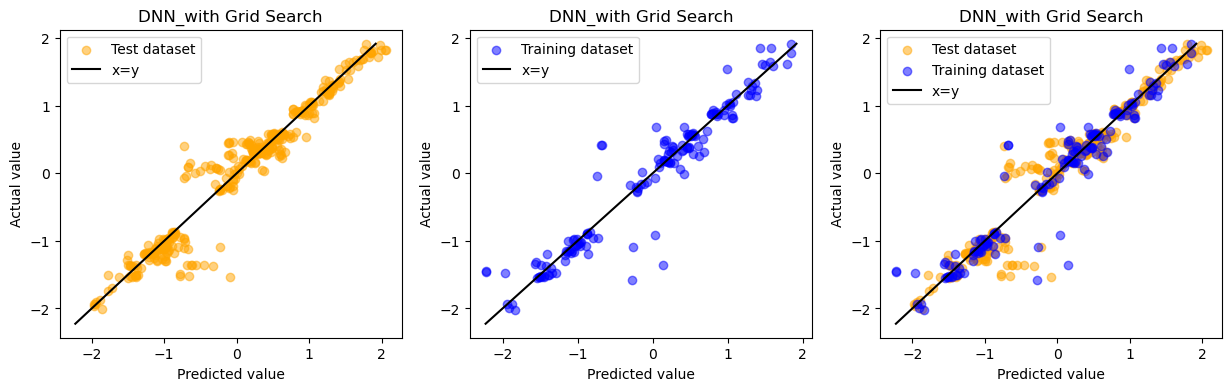

In [79]:
# 학습된 DNN을 활용하여 테스트 셋 예측
Y_scaled_train_pred = dnn_model_opt.predict(X_scaled_train)
Y_scaled_test_pred = dnn_model_opt.predict(X_scaled_test)

# DNN 학습 성능 평가 for train
mse_train = mean_squared_error(Y_scaled_train, Y_scaled_train_pred)
print("MSE_train:", mse_train)
r2_train = r2_score(Y_scaled_train, Y_scaled_train_pred)
print("R-squared_train:", r2_train)

# DNN 학습 성능 평가 for test
mse_test = mean_squared_error(Y_scaled_test, Y_scaled_test_pred)
print("MSE_test:", mse_test)
r2_test = r2_score(Y_scaled_test, Y_scaled_test_pred)
print("R-squared_test:", r2_test)

# 예측 값과 실제 값 비교를 위한 데이터 준비
plt.figure(figsize=(15, 4))  # 그래프 크기 설정

# 실제 값과 예측 값 비교를 위한 plot for test dataset
plt.subplot(1,3,1)
plt.scatter(Y_scaled_train_pred, Y_scaled_train, c='orange', alpha=0.5)
# x=y 그리기
min_val = min(min(Y_scaled_test_pred), min(Y_scaled_test))
max_val = max(max(Y_scaled_test_pred), max(Y_scaled_test))
plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='-')
# plot
plt.title("DNN_with Grid Search")
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.legend(['Test dataset','x=y'])

# 실제 값과 예측 값 비교를 위한 plot for training dataset
plt.subplot(1,3,2)
plt.scatter(Y_scaled_test_pred, Y_scaled_test, c='blue', alpha=0.5)
# x=y 그리기
min_val = min(min(Y_scaled_test_pred), min(Y_scaled_test))
max_val = max(max(Y_scaled_test_pred), max(Y_scaled_test))
plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='-')
# plot
plt.title("DNN_with Grid Search")
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.legend(['Training dataset','x=y'])

# 실제 값과 예측 값 비교를 위한 plot for training dataset
plt.subplot(1,3,3)
plt.scatter(Y_scaled_train_pred, Y_scaled_train, c='orange', alpha=0.5)
plt.scatter(Y_scaled_test_pred, Y_scaled_test, c='blue', alpha=0.5)
# x=y 그리기
min_val = min(min(Y_scaled_test_pred), min(Y_scaled_test))
max_val = max(max(Y_scaled_test_pred), max(Y_scaled_test))
plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='-')
# plot
plt.title("DNN_with Grid Search")
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.legend(['Test dataset','Training dataset','x=y'])

plt.show()